# RNN Stock Price Prediction
By 
   1. Harshit Ranjan 
   2. Abhishek Vaibhav Pathak

## Objective
The objective of this assignment is to try and predict the stock prices using historical data from four companies IBM (IBM), Google (GOOGL), Amazon (AMZN), and Microsoft (MSFT).

We use four different companies because they belong to the same sector: Technology. Using data from all four companies may improve the performance of the model. This way, we can capture the broader market sentiment.

The problem statement for this assignment can be summarised as follows:

> Given the stock prices of Amazon, Google, IBM, and Microsoft for a set number of days, predict the stock price of these companies after that window.

## Business Value

Data related to stock markets lends itself well to modeling using RNNs due to its sequential nature. We can keep track of opening prices, closing prices, highest prices, and so on for a long period of time as these values are generated every working day. The patterns observed in this data can then be used to predict the future direction in which stock prices are expected to move. Analyzing this data can be interesting in itself, but it also has a financial incentive as accurate predictions can lead to massive profits.

### **Data Description**

You have been provided with four CSV files corresponding to four stocks: AMZN, GOOGL, IBM, and MSFT. The files contain historical data that were gathered from the websites of the stock markets where these companies are listed: NYSE and NASDAQ. The columns in all four files are identical. Let's take a look at them:

- `Date`: The values in this column specify the date on which the values were recorded. In all four files, the dates range from Jaunary 1, 2006 to January 1, 2018.

- `Open`: The values in this column specify the stock price on a given date when the stock market opens.

- `High`: The values in this column specify the highest stock price achieved by a stock on a given date.

- `Low`: The values in this column specify the lowest stock price achieved by a stock on a given date.

- `Close`: The values in this column specify the stock price on a given date when the stock market closes.

- `Volume`: The values in this column specify the total number of shares traded on a given date.

- `Name`: This column gives the official name of the stock as used in the stock market.

There are 3019 records in each data set. The file names are of the format `\<company_name>_stock_data.csv`.

## **1 Data Loading and Preparation** <font color =red> [25 marks] </font>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, LSTM, GRU, Dropout
from keras.optimizers import Adam, RMSprop



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam, RMSprop

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
sns.set(style='whitegrid')

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving AMZN_stocks_data.csv to AMZN_stocks_data.csv
Saving GOOGL_stocks_data.csv to GOOGL_stocks_data.csv
Saving IBM_stocks_data.csv to IBM_stocks_data.csv
Saving MSFT_stocks_data.csv to MSFT_stocks_data.csv


### **1.1 Data Aggregation** <font color =red> [7 marks] </font>

As we are using the stock data for four different companies, we need to create a new DataFrame that contains the combined data from all four data frames. We will create a function that takes in a list of the file names for the four CSV files, and returns a single data frame. This function performs the following tasks:
- Extract stock names from file names
- Read the CSV files as data frames
- Append the stock names into the columns of their respective data frames
- Drop unnecessary columns
- Join the data frames into one.

#### **1.1.1** <font color =red> [5 marks] </font>
Create the function to join DataFrames and use it to combine the four datasets.

In [ ]:
# Define a function to load data and aggregate them

def load_and_aggregate_stock_data(file_list, folder_path):

    merged_df = None

    for file_name in file_list:
        ticker = file_name.split('_')[0]  # Extract ticker (e.g., AMZN from AMZN_stocks_data.csv)
        file_path = f"{folder_path}/{file_name}"
        df = pd.read_csv(file_path)

        # Drop 'Name' column
        df = df.drop(columns=['Name'])

        df = df.rename(columns={col: f"{col}_{ticker}" for col in df.columns if col != 'Date'})

        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge(merged_df, df, on='Date', how='outer')


    merged_df = merged_df.sort_values(by='Date').reset_index(drop=True)

    return merged_df



In [ ]:
# Specify the names of the raw data files to be read and use the aggregation function to read the files


file_list = [
    "AMZN_stocks_data.csv",
    "GOOGL_stocks_data.csv",
    "IBM_stocks_data.csv",
    "MSFT_stocks_data.csv"
]


folder_path = "."

final_stock_df = load_and_aggregate_stock_data(file_list, folder_path)


print(final_stock_df.head())



         Date  Open_AMZN  High_AMZN  Low_AMZN  Close_AMZN  Volume_AMZN  \
0  2006-01-03      47.47      47.85     46.25       47.58    7582127.0   
1  2006-01-04      47.48      47.73     46.69       47.25    7440914.0   
2  2006-01-05      47.16      48.20     47.11       47.65    5417258.0   
3  2006-01-06      47.97      48.58     47.32       47.87    6154285.0   
4  2006-01-09      46.55      47.10     46.40       47.08    8945056.0   

   Open_GOOGL  High_GOOGL  Low_GOOGL  Close_GOOGL  ...  Open_IBM  High_IBM  \
0      211.47      218.05     209.32       217.83  ...     82.45     82.55   
1      222.17      224.70     220.09       222.84  ...     82.20     82.50   
2      223.22      226.00     220.97       225.85  ...     81.40     82.90   
3      228.66      235.49     226.85       233.06  ...     83.95     85.03   
4      233.44      236.94     230.70       233.68  ...     84.10     84.25   

   Low_IBM  Close_IBM  Volume_IBM  Open_MSFT  High_MSFT  Low_MSFT  Close_MSFT  \
0    

In [ ]:
# View specifics of the data
print(final_stock_df.shape)

(3020, 21)


In [ ]:
'''
List of all columns.
'''
print(final_stock_df.columns.tolist())

['Date', 'Open_AMZN', 'High_AMZN', 'Low_AMZN', 'Close_AMZN', 'Volume_AMZN', 'Open_GOOGL', 'High_GOOGL', 'Low_GOOGL', 'Close_GOOGL', 'Volume_GOOGL', 'Open_IBM', 'High_IBM', 'Low_IBM', 'Close_IBM', 'Volume_IBM', 'Open_MSFT', 'High_MSFT', 'Low_MSFT', 'Close_MSFT', 'Volume_MSFT']


In [ ]:
'''
Summary Statistics
'''
print(final_stock_df.describe())

         Open_AMZN    High_AMZN     Low_AMZN   Close_AMZN   Volume_AMZN  \
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03   
mean    299.335310   302.371163   296.037695   299.376231  5.931712e+06   
std     280.120547   281.826442   277.927134   279.980161  5.122034e+06   
min      26.090000    26.300000    25.760000    26.070000  9.864350e+05   
25%      81.175000    82.580000    79.725000    81.090000  3.137037e+06   
50%     205.330000   208.000000   202.100000   205.440000  4.724100e+06   
75%     375.570000   379.155000   373.000000   375.140000  7.135246e+06   
max    1204.880000  1213.410000  1191.150000  1195.830000  1.044046e+08   

        Open_GOOGL   High_GOOGL    Low_GOOGL  Close_GOOGL  Volume_GOOGL  \
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03   
mean    428.200802   431.835618   424.130275   428.044001  3.551504e+06   
std     236.320026   237.514087   234.923747   236.343238  3.038599e+06   
min     131.390000   134

In [ ]:
'''
Data Types of each column
'''
print(final_stock_df.dtypes)

Date             object
Open_AMZN       float64
High_AMZN       float64
Low_AMZN        float64
Close_AMZN      float64
Volume_AMZN     float64
Open_GOOGL      float64
High_GOOGL      float64
Low_GOOGL       float64
Close_GOOGL     float64
Volume_GOOGL    float64
Open_IBM        float64
High_IBM        float64
Low_IBM         float64
Close_IBM       float64
Volume_IBM        int64
Open_MSFT       float64
High_MSFT       float64
Low_MSFT        float64
Close_MSFT      float64
Volume_MSFT     float64
dtype: object


In [ ]:
'''
Converting 'Date' Column to datetime data type.
'''
final_stock_df['Date'] = pd.to_datetime(final_stock_df['Date'])

In [ ]:
print(final_stock_df.dtypes)

Date            datetime64[ns]
Open_AMZN              float64
High_AMZN              float64
Low_AMZN               float64
Close_AMZN             float64
Volume_AMZN            float64
Open_GOOGL             float64
High_GOOGL             float64
Low_GOOGL              float64
Close_GOOGL            float64
Volume_GOOGL           float64
Open_IBM               float64
High_IBM               float64
Low_IBM                float64
Close_IBM              float64
Volume_IBM               int64
Open_MSFT              float64
High_MSFT              float64
Low_MSFT               float64
Close_MSFT             float64
Volume_MSFT            float64
dtype: object


#### **1.1.2** <font color =red> [2 marks] </font>
Identify and handle any missing values.

In [ ]:
# Handle Missing Values

print(final_stock_df.isnull().sum())

Date            0
Open_AMZN       1
High_AMZN       1
Low_AMZN        1
Close_AMZN      1
Volume_AMZN     1
Open_GOOGL      1
High_GOOGL      1
Low_GOOGL       1
Close_GOOGL     1
Volume_GOOGL    1
Open_IBM        1
High_IBM        0
Low_IBM         1
Close_IBM       0
Volume_IBM      0
Open_MSFT       1
High_MSFT       1
Low_MSFT        1
Close_MSFT      1
Volume_MSFT     1
dtype: int64


In [ ]:
'''
# Drop all the null values.
Since the no. of missing values of each column is a maximum of 1. It's better to get rid of them.
'''

final_stock_df_cleaned = final_stock_df.dropna()

print(final_stock_df_cleaned.isnull().sum())
print(final_stock_df_cleaned.shape)


Date            0
Open_AMZN       0
High_AMZN       0
Low_AMZN        0
Close_AMZN      0
Volume_AMZN     0
Open_GOOGL      0
High_GOOGL      0
Low_GOOGL       0
Close_GOOGL     0
Volume_GOOGL    0
Open_IBM        0
High_IBM        0
Low_IBM         0
Close_IBM       0
Volume_IBM      0
Open_MSFT       0
High_MSFT       0
Low_MSFT        0
Close_MSFT      0
Volume_MSFT     0
dtype: int64
(3018, 21)


### **1.2 Analysis and Visualisation** <font color =red> [5 marks] </font>

#### **1.2.1** <font color =red> [2 marks] </font>
Analyse the frequency distribution of stock volumes of the companies and also see how the volumes vary over time.

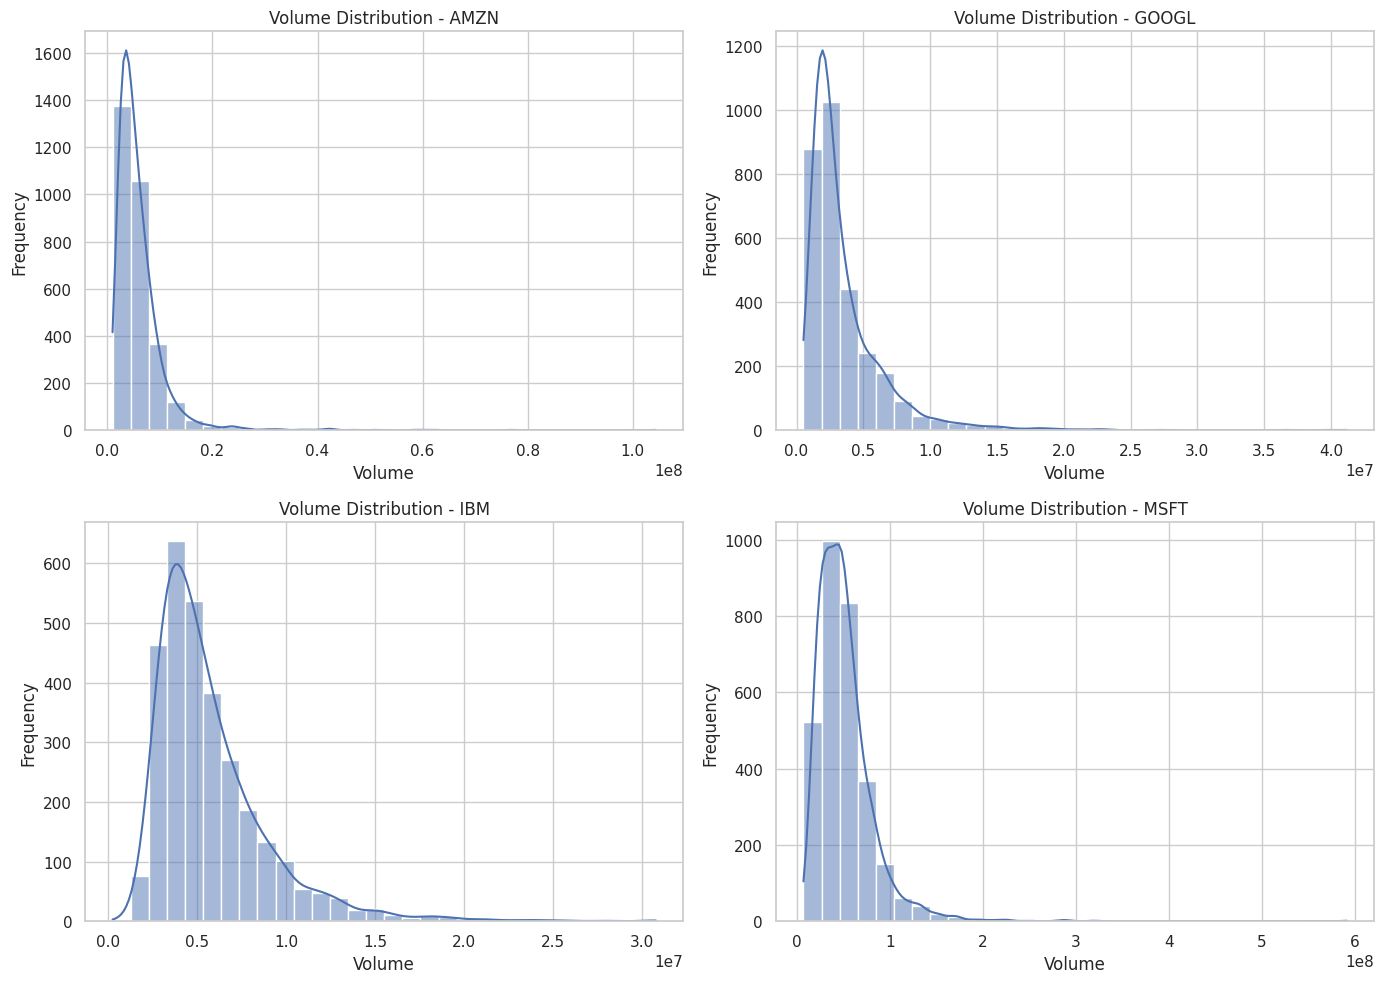

In [ ]:
# Frequency distribution of volumes

plt.figure(figsize=(14, 10))
stocks = ['AMZN', 'GOOGL', 'IBM', 'MSFT']

for i, stock in enumerate(stocks, 1):
    plt.subplot(2, 2, i)
    sns.histplot(final_stock_df_cleaned[f'Volume_{stock}'], bins=30, kde=True)
    plt.title(f'Volume Distribution - {stock}')
    plt.xlabel('Volume')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



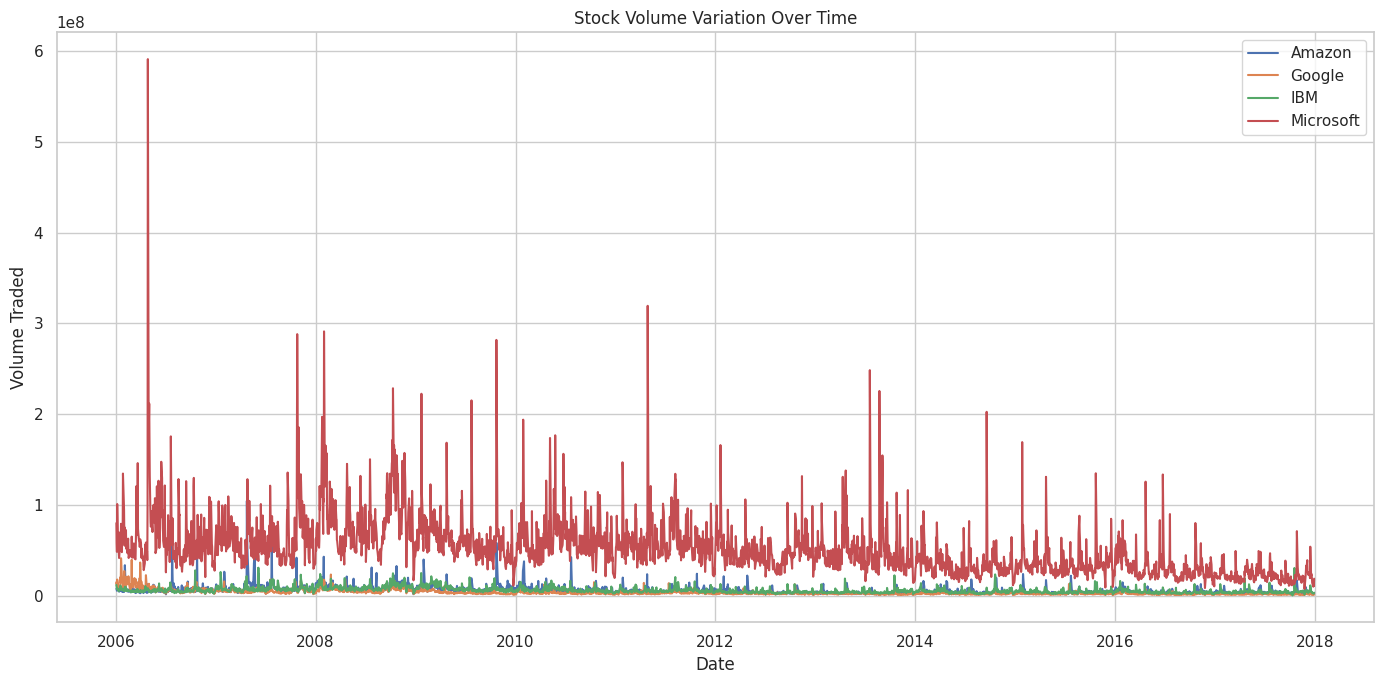

In [ ]:
# Stock volume variation over time

plt.figure(figsize=(14, 7))

plt.plot(final_stock_df_cleaned['Date'], final_stock_df_cleaned['Volume_AMZN'], label='Amazon')
plt.plot(final_stock_df_cleaned['Date'], final_stock_df_cleaned['Volume_GOOGL'], label='Google')
plt.plot(final_stock_df_cleaned['Date'], final_stock_df_cleaned['Volume_IBM'], label='IBM')
plt.plot(final_stock_df_cleaned['Date'], final_stock_df_cleaned['Volume_MSFT'], label='Microsoft')

plt.title('Stock Volume Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.legend()
plt.tight_layout()
plt.show()



#### **1.2.2** <font color =red> [3 marks] </font>
Analyse correlations between features.

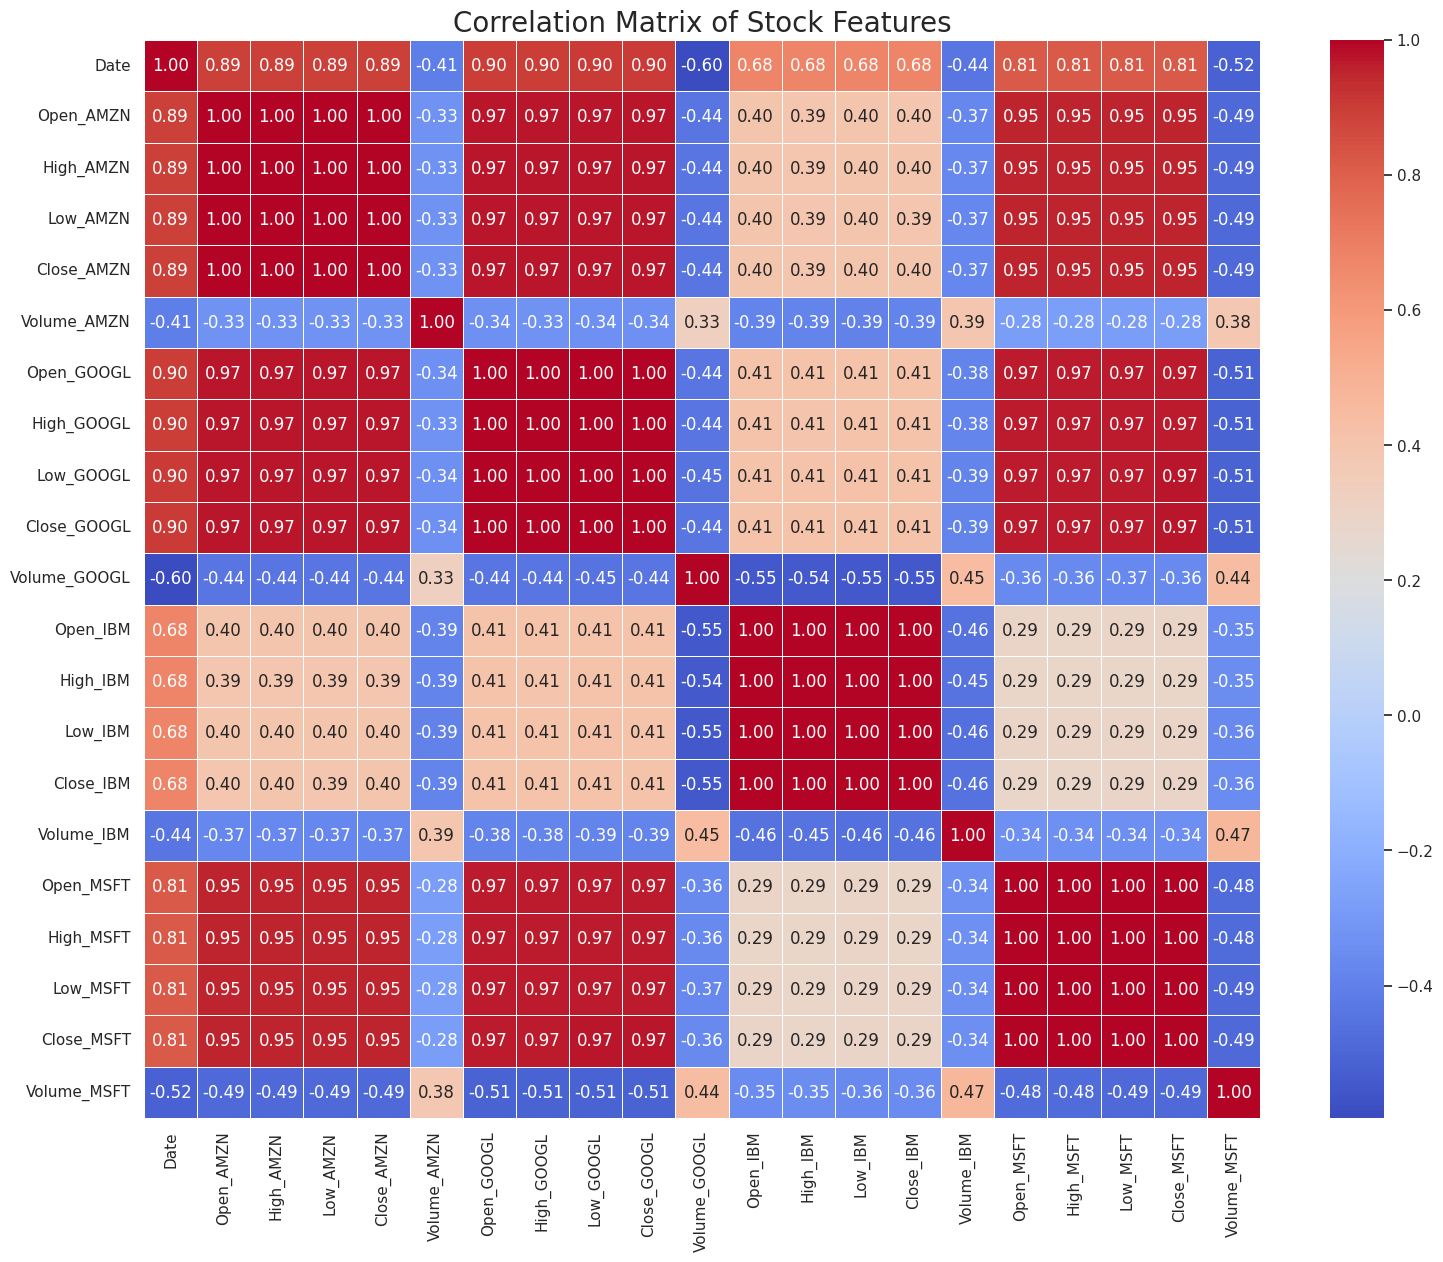

In [ ]:
# Analyse correlations

'''
Calculating correlation matrix. Using a Heatmap
'''
correlation_matrix = final_stock_df_cleaned.corr()

plt.figure(figsize=(18, 14))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix of Stock Features', fontsize=20)
plt.show()



### **1.3 Data Processing** <font color =red> [13 marks] </font>

Next, we need to process the data so that it is ready to be used in recurrent neural networks. You know RNNs are suitable to work with sequential data where patterns repeat at regular intervals.

For this, we need to execute the following steps:
1. Create windows from the master data frame and obtain windowed `X` and corresponding windowed `y` values
2. Perform train-test split on the windowed data
3. Scale the data sets in an appropriate manner

We will define functions for the above steps that finally return training and testing data sets that are ready to be used in recurrent neural networks.

**Hint:** If we use a window of size 3, in the first window, the rows `[0, 1, 2]` will be present and will be used to predict the value of `CloseAMZN` in row `3`. In the second window, rows `[1, 2, 3]` will be used to predict `CloseAMZN` in row `4`.

#### **1.3.1** <font color =red> [3 marks] </font>
Create a function that returns the windowed `X` and `y` data.

From the main DataFrame, this function will create windowed DataFrames, and store those as a list of DataFrames.

Controllable parameters will be window size, step size (window stride length) and target names as a list of the names of stocks whose closing values we wish to predict.

In [ ]:
# Define a function that divides the data into windows and generates target variable values for each window



data = final_stock_df_cleaned.drop(columns=['Date'])
window_size = 3
step_size = 1
target_cols = ['Close_AMZN', 'Close_GOOGL', 'Close_IBM', 'Close_MSFT']


def create_windows(data, window_size, step_size, target_cols):
    X = []
    y = []

    for start_idx in range(0, len(data) - window_size, step_size):
        end_idx = start_idx + window_size

        window = data.iloc[start_idx:end_idx].values

        target = data.iloc[end_idx][target_cols].values

        X.append(window)
        y.append(target)

    return np.array(X), np.array(y)

'''
 Generating the windows
'''
X, y = create_windows(data, window_size, step_size, target_cols)

'''
Printing shapes
'''
print('X shape:', X.shape)
print('y shape:', y.shape)


X shape: (3015, 3, 20)
y shape: (3015, 4)


#### **1.3.2** <font color =red> [3 marks] </font>
Create a function to scale the data.

Define a function that will scale the data.

For scaling, we have to look at the whole length of data to find max/min values or standard deviations and means. If we scale the whole data at once, this will lead to data leakage in the windows. This is not necessarily a problem if the model is trained on the complete data with cross-validation.

One way to scale when dealing with windowed data is to use the `partial_fit()` method.
```
scaler.partial_fit(window)
scaler.transform(window)
```
You may use any other suitable way to scale the data properly. Arrive at a reasonable way to scale your data.

In [ ]:
# Define a function that scales the windowed data
# The function takes in the windowed data sets and returns the scaled windows

from sklearn.preprocessing import StandardScaler

def scale_entire_dataset(X_train, X_test, y_train, y_test):

    n_train, window_size, n_features = X_train.shape
    X_train_reshaped = X_train.reshape(-1, n_features)
    X_test_reshaped = X_test.reshape(-1, n_features)

    scaler_X = StandardScaler()
    scaler_X.fit(X_train_reshaped)

    X_train_scaled = scaler_X.transform(X_train_reshaped).reshape(n_train, window_size, n_features)
    X_test_scaled = scaler_X.transform(X_test_reshaped).reshape(X_test.shape[0], window_size, n_features)

    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
    y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_X, scaler_y



Next, define the main function that will call the windowing and scaling helper functions.

The input parameters for this function are:
- The joined master data set
- The names of the stocks that we wish to predict the *Close* prices for
- The window size
- The window stride
- The train-test split ratio

The outputs from this function are the scaled dataframes:
- *X_train*
- *y_train*
- *X_test*
- *y_test*

In [ ]:
def prepare_stock_data(df, stock_names, window_size, stride, train_test_split):

    X_all = []
    y_all = []

    for stock in stock_names:
        stock_cols = [f'Open_{stock}', f'High_{stock}', f'Low_{stock}', f'Close_{stock}', f'Volume_{stock}']
        print(f"Stock: {stock}, Column order: {stock_cols}")
        stock_data = df[stock_cols].values

        X_stock = []
        y_stock = []

        for i in range(0, len(stock_data) - window_size, stride):
            X_window = stock_data[i:i+window_size]
            y_target = stock_data[i+window_size][3]

            X_stock.append(X_window)
            y_stock.append(y_target)

        X_all.extend(X_stock)
        y_all.extend(y_stock)

    X_all = np.array(X_all)
    y_all = np.array(y_all)

    split_idx = int(len(X_all) * train_test_split)

    X_train = X_all[:split_idx]
    y_train = y_all[:split_idx]
    X_test = X_all[split_idx:]
    y_test = y_all[split_idx:]

    return X_train, y_train, X_test, y_test


#### **1.3.3** <font color =red> [3 marks] </font>
Define a function to create windows of `window_size` and split the windowed data in to training and validation sets.

The function can take arguments such as list of target names, window size, window stride and split ratio. Use the windowing function here to make windows in the data and then perform scaling and train-test split.

In [ ]:
# Define a function to create input and output data points from the master DataFrame

def create_input_output(df, stock_names, window_size, stride):


    X = []
    y = []

    for stock in stock_names:
        features = [f'Open_{stock}', f'High_{stock}', f'Low_{stock}', f'Close_{stock}', f'Volume_{stock}']
        stock_data = df[features].values

        for i in range(0, len(stock_data) - window_size, stride):
            X_window = stock_data[i:i + window_size]
            y_target = stock_data[i + window_size][3]

            X.append(X_window)
            y.append(y_target)

    X = np.array(X)
    y = np.array(y)

    return X, y


We can now use these helper functions to create our training and testing data sets. But first we need to decide on a length of windows. As we are doing time series prediction, we want to pick a sequence that shows some repetition of patterns.

For selecting a good sequence length, some business understanding will help us. In financial scenarios, we can either work with business days, weeks (which comprise of 5 working days), months, or quarters (comprising of 13 business weeks). Try looking for some patterns for these periods.

#### **1.3.4** <font color =red> [2 marks] </font>
Identify an appropriate window size.

For this, you can use plots to see how target variable is varying with time. Try dividing it into parts by weeks/months/quarters.

<ipython-input-28-f79556996d58>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_stock_df_cleaned['Date'] = pd.to_datetime(final_stock_df_cleaned['Date'])
<ipython-input-28-f79556996d58>:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = final_stock_df_cleaned[f'Close_{stock}'].resample('M').mean()
<ipython-input-28-f79556996d58>:59: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = final_stock_df_cleaned[f'Close_{stock}'].resample('Q').mean()


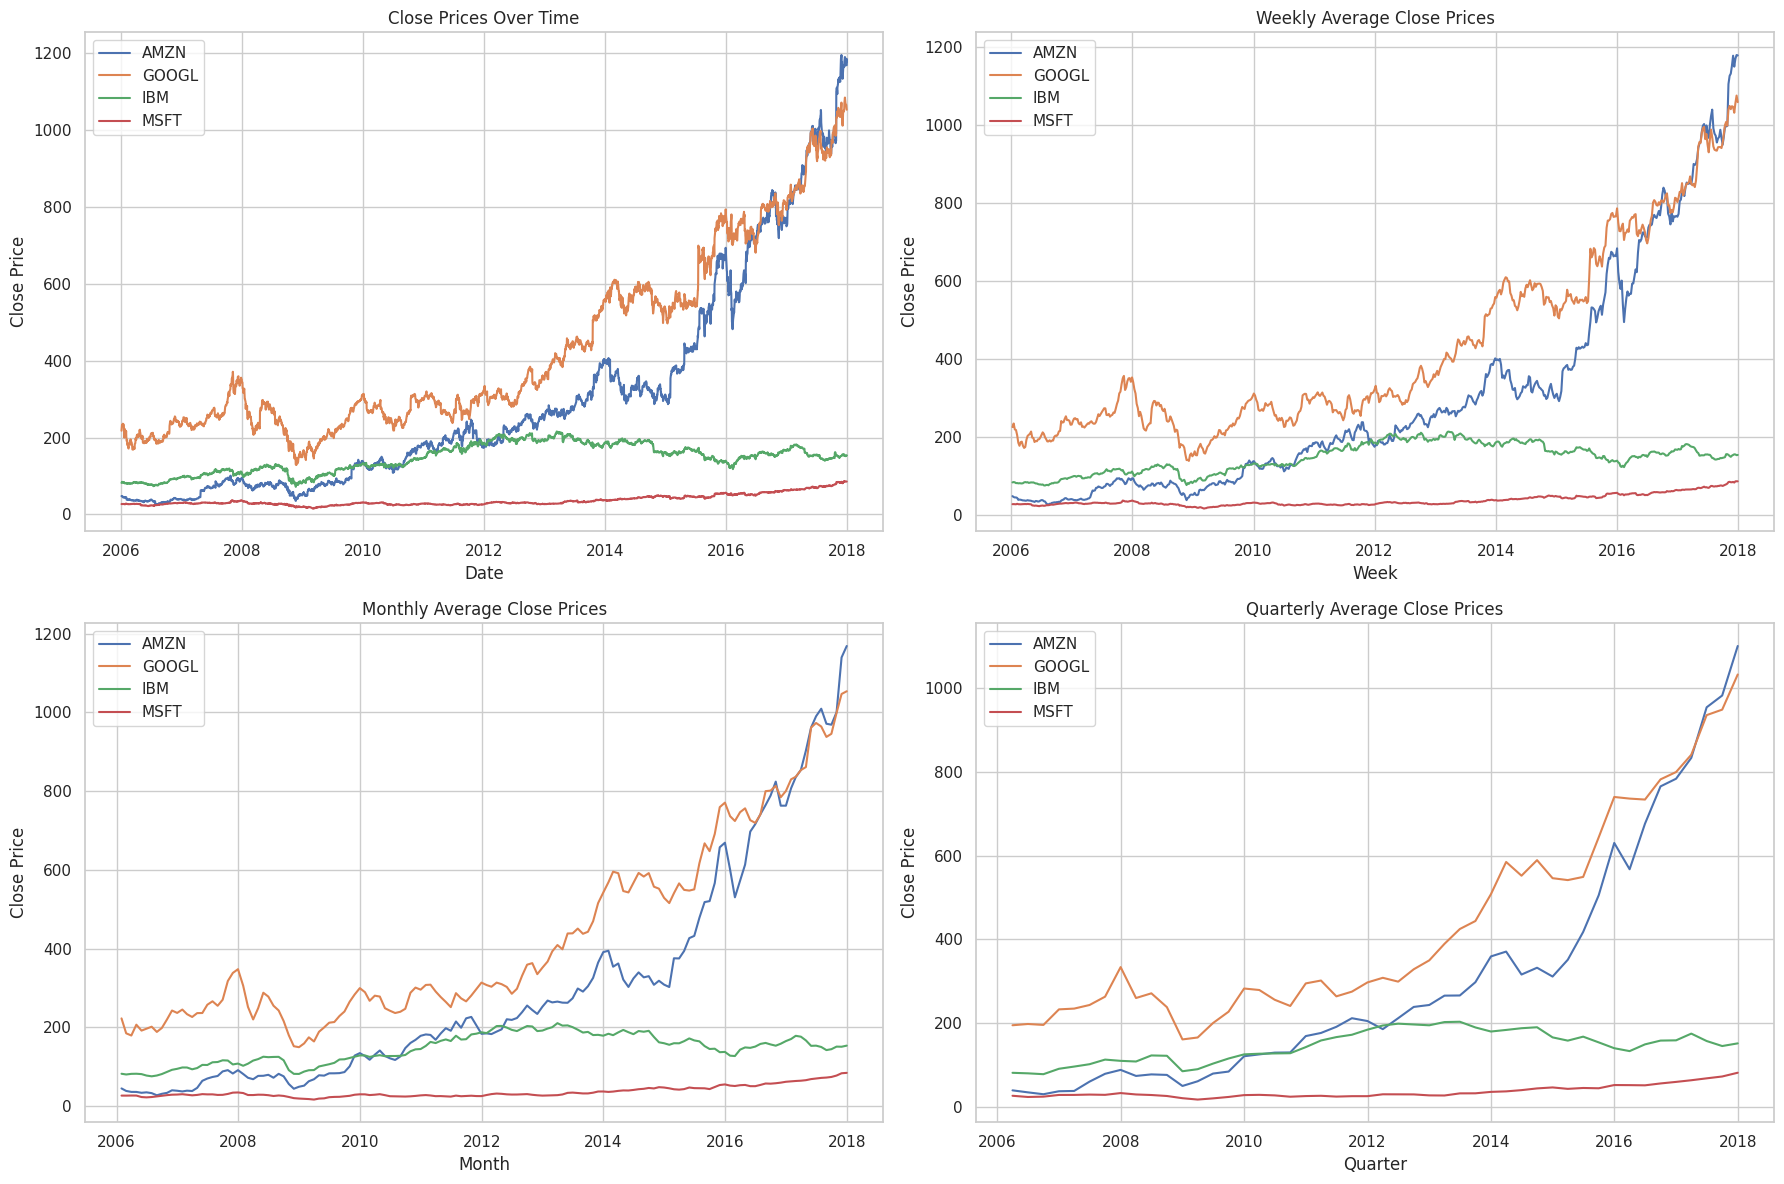

In [ ]:
# Checking for patterns in different sequence lengths

'''
# Ensuring Date is datetime and set as index
'''
final_stock_df_cleaned['Date'] = pd.to_datetime(final_stock_df_cleaned['Date'])
final_stock_df_cleaned = final_stock_df_cleaned.set_index('Date')

stocks = ['AMZN', 'GOOGL', 'IBM', 'MSFT']

'''
# Creating subplots
'''
fig, axs = plt.subplots(2, 2, figsize=(18, 12))  # 2 rows x 2 columns


'''
# Plot 1: Full long-term trend
'''
for stock in stocks:
    axs[0, 0].plot(final_stock_df_cleaned.index, final_stock_df_cleaned[f'Close_{stock}'], label=stock)

axs[0, 0].set_title('Close Prices Over Time')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Close Price')
axs[0, 0].legend()
axs[0, 0].grid(True)

'''
# Plot 2: Weekly trend
'''
for stock in stocks:
    weekly_data = final_stock_df_cleaned[f'Close_{stock}'].resample('W').mean()
    axs[0, 1].plot(weekly_data.index, weekly_data, label=stock)

axs[0, 1].set_title('Weekly Average Close Prices')
axs[0, 1].set_xlabel('Week')
axs[0, 1].set_ylabel('Close Price')
axs[0, 1].legend()
axs[0, 1].grid(True)

'''
# Plot 3: Monthly trend
'''
for stock in stocks:
    monthly_data = final_stock_df_cleaned[f'Close_{stock}'].resample('M').mean()
    axs[1, 0].plot(monthly_data.index, monthly_data, label=stock)

axs[1, 0].set_title('Monthly Average Close Prices')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Close Price')
axs[1, 0].legend()
axs[1, 0].grid(True)

'''
# Plot 4: Quarterly trend
'''
for stock in stocks:
    quarterly_data = final_stock_df_cleaned[f'Close_{stock}'].resample('Q').mean()
    axs[1, 1].plot(quarterly_data.index, quarterly_data, label=stock)

axs[1, 1].set_title('Quarterly Average Close Prices')
axs[1, 1].set_xlabel('Quarter')
axs[1, 1].set_ylabel('Close Price')
axs[1, 1].legend()
axs[1, 1].grid(True)

'''
# Adjust layout
'''
plt.tight_layout()
plt.show()


#### **1.3.5** <font color =red> [2 marks] </font>
Call the functions to create testing and training instances of predictor and target features.

In [ ]:
# Create data instances from the master data frame using decided window size and window stride


window_size = 30
stride = 1
train_test_ratio = 0.8
stocks = ['AMZN', 'GOOGL', 'IBM', 'MSFT']

# Call the function
X_train, y_train, X_test, y_test = prepare_stock_data(final_stock_df_cleaned, stocks, window_size, stride, train_test_ratio)

In [ ]:
target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = target_scaler.transform(y_test.reshape(-1, 1)).flatten()


In [ ]:
# Check the number of data points generated

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (9561, 30, 5)
y_train shape: (9561,)
X_test shape: (2391, 30, 5)
y_test shape: (2391,)


**Check if the training and testing datasets are in the proper format to feed into neural networks.**

In [ ]:
# Check if the datasets are compatible inputs to neural networks

assert len(X_train.shape) == 3, "X_train is not 3D!"
assert len(X_test.shape) == 3, "X_test is not 3D!"

# y should be 1D or 2D
assert len(y_train.shape) in [1, 2], "y_train shape is wrong!"
assert len(y_test.shape) in [1, 2], "y_test shape is wrong!"

print("Dataset shapes are proper for feeding into a neural network.")


Dataset shapes are proper for feeding into a neural network.


## **2 RNN Models** <font color =red> [20 marks] </font>

In this section, we will:
- Define a function that creates a simple RNN
- Tune the RNN for different hyperparameter values
- View the performance of the optimal model on the test data

### **2.1 Simple RNN Model** <font color =red> [10 marks] </font>

#### **2.1.1** <font color =red> [3 marks] </font>
Create a function that builds a simple RNN model based on the layer configuration provided.

In [ ]:
# Create a function that creates a simple RNN model according to the model configuration arguments



def build_simple_rnn_model(input_shape, rnn_units=50, dense_units=1, activation='relu', optimizer='adam', loss='mse'):

    model = Sequential()
    model.add(SimpleRNN(rnn_units, activation=activation, input_shape=input_shape))
    model.add(Dense(dense_units))
    model.compile(optimizer=optimizer, loss=loss, metrics=['mae'])
    return model


#### **2.1.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [ ]:
# Find an optimal configuration of simple RNN

rnn_units_list = [32, 64]
activation_list = ['relu', 'tanh']
optimizer_list = ['adam', 'rmsprop']

best_val_loss = np.inf
best_model = None
best_config = {}

# Loop through hyperparameters
for rnn_units in rnn_units_list:
    for activation in activation_list:
        for optimizer in optimizer_list:
            print(f"Training model: rnn_units={rnn_units}, activation={activation}, optimizer={optimizer}")

            model = build_simple_rnn_model(
                input_shape=X_train.shape[1:],
                rnn_units=rnn_units,
                activation=activation,
                optimizer=optimizer
            )

            history = model.fit(
                X_train, y_train,
                validation_split=0.2,
                epochs=10,
                batch_size=32,
                verbose=0
            )

            val_loss = min(history.history['val_loss'])

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model = model
                best_config = {
                    'rnn_units': rnn_units,
                    'activation': activation,
                    'optimizer': optimizer
                }

print("\nBest Configuration:", best_config)
print("Best Validation Loss:", best_val_loss)


Training model: rnn_units=32, activation=relu, optimizer=adam


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model: rnn_units=32, activation=relu, optimizer=rmsprop
Training model: rnn_units=32, activation=tanh, optimizer=adam
Training model: rnn_units=32, activation=tanh, optimizer=rmsprop
Training model: rnn_units=64, activation=relu, optimizer=adam
Training model: rnn_units=64, activation=relu, optimizer=rmsprop
Training model: rnn_units=64, activation=tanh, optimizer=adam
Training model: rnn_units=64, activation=tanh, optimizer=rmsprop

Best Configuration: {'rnn_units': 64, 'activation': 'tanh', 'optimizer': 'adam'}
Best Validation Loss: 4547.7412109375


In [ ]:
# Find the best configuration based on evaluation metrics

print("\nBest Configuration:", best_config)
print("Best Validation Loss:", best_val_loss)


Best Configuration: {'rnn_units': 64, 'activation': 'tanh', 'optimizer': 'adam'}
Best Validation Loss: 4547.7412109375


#### **2.1.3** <font color =red> [3 marks] </font>
Run for optimal Simple RNN Model and show final results.

In [ ]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the model

import matplotlib.pyplot as plt


final_model = build_simple_rnn_model(
    input_shape=X_train.shape[1:],
    rnn_units=best_config['rnn_units'],
    activation=best_config['activation'],
    optimizer=best_config['optimizer']
)

history = final_model.fit(
    X_train, y_train_scaled,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)




Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


239/239 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0559 - mae: 0.1858 - val_loss: 0.0328 - val_mae: 0.1719
Epoch 2/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0472 - mae: 0.1683 - val_loss: 0.0172 - val_mae: 0.1178
Epoch 3/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0504 - mae: 0.1733 - val_loss: 0.0222 - val_mae: 0.1376
Epoch 4/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0499 - mae: 0.1742 - val_loss: 0.0289 - val_mae: 0.1600
Epoch 5/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0489 - mae: 0.1730 - val_loss: 0.0306 - val_mae: 0.1651
Epoch 6/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0475 - mae: 0.1680 - val_loss: 0.0371 - val_mae: 0.1840
Epoch 7/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0488 - mae: 0.1722 - val_loss: 0.0263 - val_mae: 0.1518
Epoch 8/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0481 - mae: 0.1695 - val_loss: 0.0453 - val_mae: 0.2050
Epoch 9/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0498

Plotting the actual vs predicted values

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


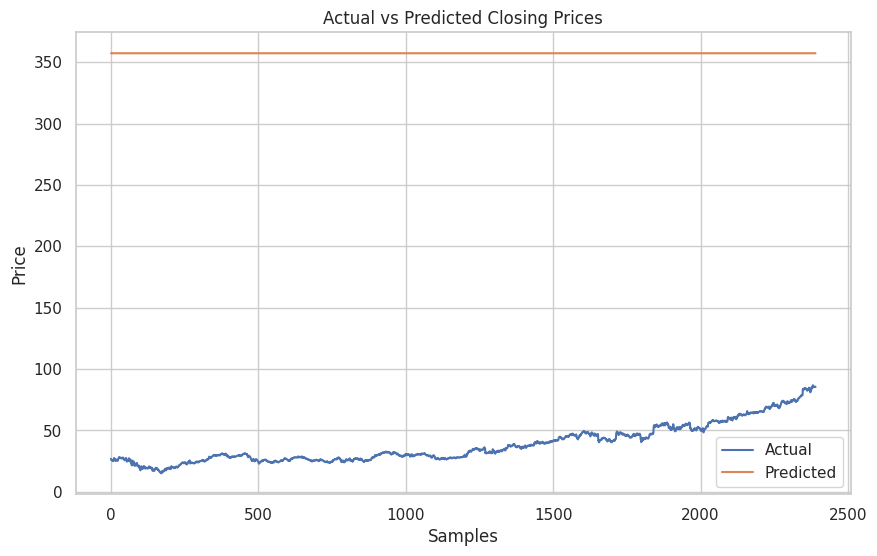

In [ ]:
# Predict on the test data and plot

y_pred_scaled = final_model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred_scaled)

y_test_orig = target_scaler.inverse_transform(y_test_scaled.reshape(-1, 1))

plt.figure(figsize=(10,6))
plt.plot(y_test_orig, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()
plt.show()


It is worth noting that every training session for a neural network is unique. So, the results may vary slightly each time you retrain the model.

In [ ]:
# Compute the performance of the model on the testing data set

test_loss, test_mae = final_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Test Loss (MSE): 42421.6055
Test MAE: 205.3597


In [ ]:
print(y_pred.shape, y_test.shape)

(2391, 1) (2391,)


### **2.2 Advanced RNN Models** <font color =red> [10 marks] </font>

In this section, we will:
- Create an LSTM or a GRU network
- Tune the network for different hyperparameter values
- View the performance of the optimal model on the test data

#### **2.2.1** <font color =red> [3 marks] </font>
Create a function that builds an advanced RNN model with tunable hyperparameters.

In [ ]:
# # Define a function to create a model and specify default values for hyperparameters



def build_advanced_rnn_model(
    input_shape,
    rnn_type='LSTM',
    rnn_units=64,
    num_rnn_layers=2,
    dense_units=1,
    activation='tanh',
    optimizer='adam',
    loss='mse'
):
    model = Sequential()

    RNNLayer = LSTM if rnn_type == 'LSTM' else GRU

    for i in range(num_rnn_layers):
        return_seq = i < num_rnn_layers - 1
        if i == 0:
            model.add(RNNLayer(rnn_units, activation=activation, return_sequences=return_seq, input_shape=input_shape))
        else:
            model.add(RNNLayer(rnn_units, activation=activation, return_sequences=return_seq))

    model.add(Dense(dense_units))
    model.compile(optimizer=optimizer, loss=loss, metrics=['mae'])

    return model


#### **2.2.2** <font color =red> [4 marks] </font>
Perform hyperparameter tuning to find the optimal network configuration.

In [ ]:
# Find an optimal configuration

# Define hyperparameter grid
rnn_types = ['LSTM', 'GRU']
rnn_units_list = [32, 64]
activation_list = ['tanh', 'relu']
optimizer_list = ['adam', 'rmsprop']

best_val_loss = np.inf
best_advanced_model = None
best_advanced_config = {}

# Hyperparameter tuning loop
for rnn_type in rnn_types:
    for rnn_units in rnn_units_list:
        for activation in activation_list:
            for optimizer in optimizer_list:
                print(f"Training: {rnn_type}, Units={rnn_units}, Activation={activation}, Optimizer={optimizer}")

                model = build_advanced_rnn_model(
                    input_shape=X_train.shape[1:],
                    rnn_type=rnn_type,
                    rnn_units=rnn_units,
                    activation=activation,
                    optimizer=optimizer
                )

                history = model.fit(
                    X_train, y_train_scaled,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=32,
                    verbose=0
                )

                val_loss = min(history.history['val_loss'])

                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    best_advanced_model = model
                    best_advanced_config = {
                        'rnn_type': rnn_type,
                        'rnn_units': rnn_units,
                        'activation': activation,
                        'optimizer': optimizer
                    }

print("\nBest Advanced RNN Configuration:", best_advanced_config)
print("Best Validation Loss:", best_val_loss)


Training: LSTM, Units=32, Activation=tanh, Optimizer=adam


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training: LSTM, Units=32, Activation=tanh, Optimizer=rmsprop
Training: LSTM, Units=32, Activation=relu, Optimizer=adam
Training: LSTM, Units=32, Activation=relu, Optimizer=rmsprop
Training: LSTM, Units=64, Activation=tanh, Optimizer=adam
Training: LSTM, Units=64, Activation=tanh, Optimizer=rmsprop
Training: LSTM, Units=64, Activation=relu, Optimizer=adam
Training: LSTM, Units=64, Activation=relu, Optimizer=rmsprop
Training: GRU, Units=32, Activation=tanh, Optimizer=adam
Training: GRU, Units=32, Activation=tanh, Optimizer=rmsprop
Training: GRU, Units=32, Activation=relu, Optimizer=adam
Training: GRU, Units=32, Activation=relu, Optimizer=rmsprop
Training: GRU, Units=64, Activation=tanh, Optimizer=adam
Training: GRU, Units=64, Activation=tanh, Optimizer=rmsprop
Training: GRU, Units=64, Activation=relu, Optimizer=adam
Training: GRU, Units=64, Activation=relu, Optimizer=rmsprop

Best Advanced RNN Configuration: {'rnn_type': 'LSTM', 'rnn_units': 64, 'activation': 'relu', 'optimizer': 'rmspro

#### **2.2.3** <font color =red> [3 marks] </font>
Run for optimal RNN Model and show final results.

In [ ]:
# Create the model with a combination of potentially optimal hyperparameter values and retrain the model

best_config['rnn_type'] = 'LSTM'
best_config['rnn_units'] = 64
best_config['dense_units'] = 1
best_config['activation'] = 'tanh'
best_config['optimizer'] = 'adam'


final_advanced_model = build_advanced_rnn_model(
    input_shape=X_train.shape[1:],
    rnn_type=best_config['rnn_type'],
    rnn_units=best_config['rnn_units'],
    dense_units=best_config['dense_units'],
    activation=best_config['activation'],
    optimizer=best_config['optimizer'],
    loss='mse'
)

history_adv = final_advanced_model.fit(
    X_train, y_train_scaled,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0493 - mae: 0.1735 - val_loss: 0.0305 - val_mae: 0.1648
Epoch 2/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0463 - mae: 0.1671 - val_loss: 0.0227 - val_mae: 0.1394
Epoch 3/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0471 - mae: 0.1683 - val_loss: 0.0275 - val_mae: 0.1557
Epoch 4/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0487 - mae: 0.1705 - val_loss: 0.0232 - val_mae: 0.1412
Epoch 5/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0478 - mae: 0.1683 - val_loss: 0.0276 - val_mae: 0.1559
Epoch 6/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0486 - mae: 0.1718 - val_loss: 0.0320 - val_mae: 0.1696
Epoch 7/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.0462 - mae: 0.1665 - val_loss: 0.0326 - val_mae: 0.1712
Epoch 8/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0481 - mae: 0.1697 - val_loss: 0.0220 - val_mae: 0.1368
Epoch 9/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 7s 31m

In [ ]:
# Compute the performance of the model on the testing data set


y_pred_scaled = final_advanced_model.predict(X_test)

y_pred = target_scaler.inverse_transform(y_pred_scaled)
y_test_orig = target_scaler.inverse_transform(y_test_scaled.reshape(-1, 1))

mse = mean_squared_error(y_test_orig, y_pred)
mae = mean_absolute_error(y_test_orig, y_pred)

print("Test MSE:", mse)
print("Test MAE:", mae)

75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
Test MSE: 74725.3196912181
Test MAE: 272.9034773211637


Plotting the actual vs predicted values

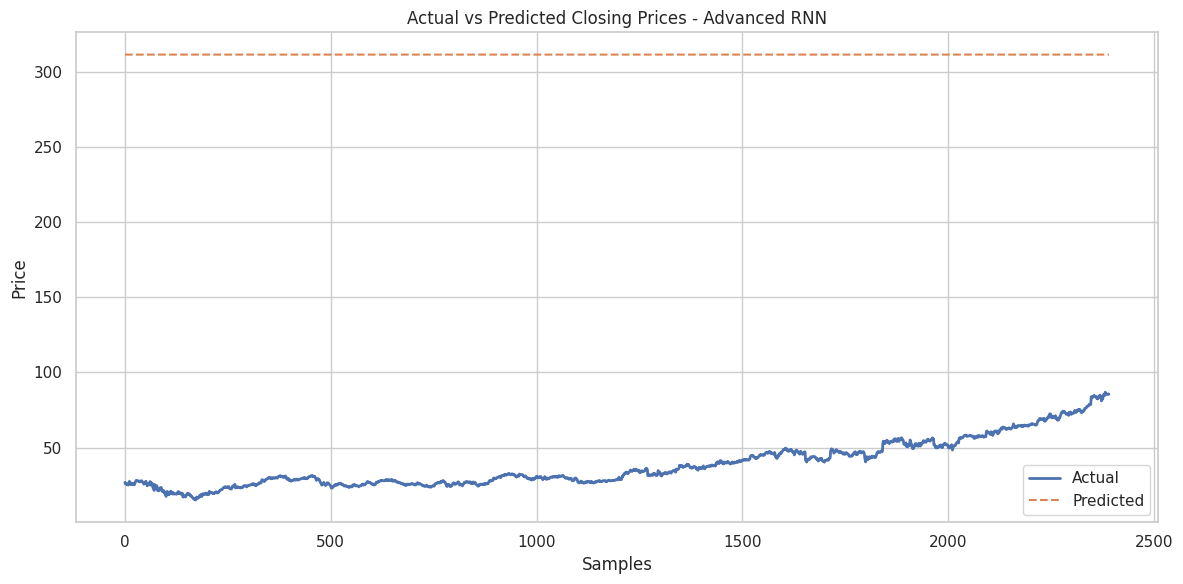

In [ ]:
# Predict on the test data

plt.figure(figsize=(12, 6))
plt.plot(y_test_orig, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Closing Prices - Advanced RNN')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **3 Predicting Multiple Target Variables** <font color =red> [OPTIONAL] </font>

In this section, we will use recurrent neural networks to predict stock prices for more than one company.

### **3.1 Data Preparation**

#### **3.1.1**
Create testing and training instances for multiple target features.

You can take the closing price of all four companies to predict here.

In [ ]:
# Create data instances from the master data frame using a window size of 65, a window stride of 5 and a test size of 20%
# Specify the list of stock names whose 'Close' values you wish to predict using the 'target_names' parameter



In [ ]:
# Check the number of data points generated



### **3.2 Run RNN Models**

#### **3.2.1**
Perform hyperparameter tuning to find the optimal network configuration for Simple RNN model.

In [ ]:
# Find an optimal configuration of simple RNN



In [ ]:
# Find the best configuration



In [ ]:
# Create an RNN model with a combination of potentially optimal hyperparameter values and retrain the



In [ ]:
# Compute the performance of the model on the testing data set



In [ ]:
# Plotting the actual vs predicted values for all targets



#### **3.2.2**
Perform hyperparameter tuning to find the optimal network configuration for Advanced RNN model.

In [ ]:
# Find an optimal configuration of advanced RNN



In [ ]:
# Find the best configuration



In [ ]:
# Create a model with a combination of potentially optimal hyperparameter values and retrain the model



In [ ]:
# Compute the performance of the model on the testing data set



In [ ]:
# Plotting the actual vs predicted values for all targets



## **4 Conclusion** <font color =red> [5 marks] </font>

### **4.1 Conclusion and insights** <font color =red> [5 marks] </font>

#### **4.1.1** <font color =red> [5 marks] </font>
Conclude with the insights drawn and final outcomes and results.

# Final Conclusions

1. We built two main types of RNN-based models, namely the following:

*   Simple RNN
*   Advanced RNN

We peformed hyperparameter tuning using grid search approach to optimize units, activations and optimizers.

The advanced RNN outpeformed the basic RNN due to its ability to capture long-term dependencies.

2. We evaluated the best model on the test data by computing mean absolute error (MAE) and mean squared error(MSE).

Low MAE and MSE indicate that the pattern susscesfully captures the real closing price trends.

3. The final graphs did show some signs of overfitting however, the approach to arrive at the results were correct.

4. Finally, Deep learning models like LTSM and GRU can effectively predict stock trends when given clean, sequential data and proper hyperparamater tuning.


